<a href="https://colab.research.google.com/github/carlakim/SNA/blob/main/Copy_SUICA_of_BR_Servia_Qatar_SNA_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplsoccer

In [ ]:
import json
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgba
from mplsoccer import Pitch, FontManager

#Pass network
time separados

[Blog Link](https://www.dzialowski.eu/football-data-visualisations/)


[Copa e classificatorias](https://1xbet.whoscored.com/Search/?t=world+cup)



In [ ]:
def extract_json_from_html(html_path, save_output=False):
    html_file = open(html_path, 'r')
    html = html_file.read()
    html_file.close()
    regex_pattern = r'(?<=require\.config\.params\["args"\].=.)[\s\S]*?;'
    data_txt = re.findall(regex_pattern, html)[0]

    # add quotations for json parser
    data_txt = data_txt.replace('matchId', '"matchId"')
    data_txt = data_txt.replace('matchCentreData', '"matchCentreData"')
    data_txt = data_txt.replace('matchCentreEventTypeJson', '"matchCentreEventTypeJson"')
    data_txt = data_txt.replace('formationIdNameMappings', '"formationIdNameMappings"')
    data_txt = data_txt.replace('};', '}')

    if save_output:
        # save json data to txt
        output_file = open(f"{html_path}.txt", "wt")
        n = output_file.write(data_txt)
        output_file.close()

    return data_txt

In [ ]:
def extract_data_from_dict(data):
    # load data from json
    event_types_json = data["matchCentreEventTypeJson"]
    formation_mappings = data["formationIdNameMappings"]
    events_dict = data["matchCentreData"]["events"]
    teams_dict = {data["matchCentreData"]['home']['teamId']: data["matchCentreData"]['home']['name'],
                  data["matchCentreData"]['away']['teamId']: data["matchCentreData"]['away']['name']}
    players_dict = data["matchCentreData"]["playerIdNameDictionary"]

    # create players dataframe
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df["teamId"] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df["teamId"] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df])
    players_ids = data["matchCentreData"]["playerIdNameDictionary"]
    return events_dict, players_df, teams_dict

In [ ]:
match_html_path = './Brazil 1-0 Switzerland - FIFA World Cup 2022 Live.html'
json_data_txt = extract_json_from_html(match_html_path)
data = json.loads(json_data_txt)
events_dict, players_df, teams_dict = extract_data_from_dict(data)

In [ ]:
players_df

,playerId,shirtNo,name,position,height,weight,age,isFirstEleven,isManOfTheMatch,field,stats,subbedInPlayerId,subbedOutPeriod,subbedOutExpandedMinute,subbedInPeriod,subbedInExpandedMinute,subbedOutPlayerId,teamId
0,114147,1,Alisson,GK,193,91,30,True,False,home,"{'possession': {'0': 1.0, '4': 1.0, '5': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,409
1,337879,14,Éder Militão,DR,186,78,24,True,False,home,"{'possession': {'0': 1.0, '3': 2.0, '7': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,409
2,28550,3,Thiago Silva,DC,183,79,38,True,False,home,"{'possession': {'0': 2.0, '1': 2.0, '6': 5.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,409
3,101949,4,Marquinhos,DC,183,75,28,True,False,home,"{'possession': {'0': 2.0, '1': 1.0, '3': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,409
4,100995,6,Alex Sandro,DL,180,80,31,True,True,home,"{'possession': {'0': 1.0, '1': 1.0, '2': 1.0, ...",125793.0,"{'value': 2, 'displayName': 'SecondHalf'}",86.0,NaN,NaN,NaN,409
5,88526,5,Casemiro,MC,185,84,30,True,False,home,"{'possession': {'0': 1.0, '4': 1.0, '6': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,409
6,114397,8,Fred,MC,169,64,29,True,False,home,"{'possession': {'4': 1.0, '8': 1.0, '10': 2.0,...",338780.0,"{'value': 2, 'displayName': 'SecondHalf'}",58.0,NaN,NaN,NaN,409
7,319756,7,Lucas Paquetá,MC,180,72,25,True,False,home,"{'possession': {'0': 2.0, '3': 1.0, '6': 4.0, ...",347862.0,"{'value': 2, 'displayName': 'SecondHalf'}",46.0,NaN,NaN,NaN,409
8,300447,11,Raphinha,FWR,176,68,25,True,False,home,"{'possession': {'2': 1.0, '4': 1.0, '8': 1.0, ...",364315.0,"{'value': 2, 'displayName': 'SecondHalf'}",73.0,NaN,NaN,NaN,409
9,317804,9,Richarlison,FW,184,83,25,True,False,home,"{'possession': {'11': 1.0, '19': 1.0, '22': 1....",279379.0,"{'value': 2, 'displayName': 'SecondHalf'}",73.0,NaN,NaN,NaN,409


Full game passes Dataframe

In [ ]:
def get_passes_df(events_dict):
    df = pd.DataFrame(events_dict)
    df['eventType'] = df.apply(lambda row: row['type']['displayName'], axis=1)
    df['outcomeType'] = df.apply(lambda row: row['outcomeType']['displayName'], axis=1)

    # create receiver column based on the next event
    # this will be correct only for successfull passes
    df["receiver"] = df["playerId"].shift(-1)

    # filter only passes
    passes_ids = df.index[df['eventType'] == 'Pass']
    df_passes = df.loc[
        passes_ids, ["id","x", "y", "endX", "endY", "teamId", "playerId", "receiver", "eventType", "outcomeType"]]

    return df_passes

In [ ]:
passes_df = get_passes_df(events_dict)
passes_df

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType
2,2.488192e+09,49.8,50.0,29.9,37.6,423,317630.0,297390.0,Pass,Successful
3,2.488192e+09,45.8,45.1,42.1,66.5,423,297390.0,243534.0,Pass,Successful
4,2.488192e+09,43.2,67.8,43.5,84.8,423,243534.0,61610.0,Pass,Successful
5,2.488192e+09,42.8,88.4,56.8,95.9,423,61610.0,381550.0,Pass,Successful
6,2.488192e+09,56.8,95.9,62.6,76.8,423,381550.0,143695.0,Pass,Successful
...,...,...,...,...,...,...,...,...,...,...
1639,2.488207e+09,23.3,37.9,60.2,77.9,423,89401.0,364315.0,Pass,Unsuccessful
1640,2.488207e+09,41.0,24.5,41.6,34.0,409,364315.0,337879.0,Pass,Successful
1642,2.488207e+09,41.6,34.0,34.5,55.7,409,337879.0,28550.0,Pass,Successful
1643,2.488207e+09,34.5,55.7,39.3,54.0,409,28550.0,88526.0,Pass,Successful


#tutorial video

https://www.youtube.com/watch?v=fPcY9dbOMGM&t=332s

In [ ]:
passes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 2 to 1606
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1067 non-null   float64
 1   x            1067 non-null   float64
 2   y            1067 non-null   float64
 3   endX         1067 non-null   float64
 4   endY         1067 non-null   float64
 5   teamId       1067 non-null   int64  
 6   playerId     1067 non-null   float64
 7   receiver     1065 non-null   float64
 8   eventType    1067 non-null   object 
 9   outcomeType  1067 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 91.7+ KB


##brasil

In [ ]:
#only BR
#only successful passes
BRpass_df = passes_df[passes_df.teamId != 771]
BRpass_df = passes_df[passes_df.outcomeType != "Unsuccessful"]

BRpass_df

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType
2,2.487478e+09,50.0,49.9,52.3,52.8,409,317804.0,50835.0,Pass,Successful
3,2.487478e+09,50.6,61.4,39.0,93.8,409,50835.0,100995.0,Pass,Successful
4,2.487478e+09,44.2,91.7,37.9,70.1,409,100995.0,88526.0,Pass,Successful
5,2.487478e+09,35.8,68.5,28.1,52.7,409,88526.0,28550.0,Pass,Successful
6,2.487478e+09,29.8,50.1,29.6,78.3,409,28550.0,100995.0,Pass,Successful
...,...,...,...,...,...,...,...,...,...,...
1602,2.487494e+09,41.9,97.1,25.9,86.6,771,302441.0,383864.0,Pass,Successful
1603,2.487494e+09,25.5,82.1,19.2,60.9,771,383864.0,149474.0,Pass,Successful
1604,2.487494e+09,19.2,60.8,26.4,27.0,771,149474.0,141399.0,Pass,Successful
1605,2.487494e+09,62.0,20.3,65.8,62.4,771,141399.0,401042.0,Pass,Successful


In [ ]:
#this makes it so our passer and recipients are float values
pas = pd.to_numeric(BRpass_df['playerId'],downcast='integer')
rec = pd.to_numeric(BRpass_df['receiver'],downcast='integer')
BRpass_df['playerId'] = pas
BRpass_df['receiver'] = rec

In [ ]:
#find average location dataframe
averagelocationBR = BRpass_df.groupby('playerId').agg({'x':['mean'],'y':['mean','count']})
averagelocationBR.columns = ['x','y','count']
averagelocationBR

,x,y,count
playerId,,,
28550,37.039706,62.370588,68
29474,69.252632,52.336842,19
38442,33.257143,12.871429,7
50835,62.775000,73.619444,36
77417,41.959259,57.292593,27
88300,50.577778,14.868056,72
88526,51.758182,53.314545,55
100615,52.235000,89.665000,20
100995,50.169880,84.293976,83


##servia

##erro mas é desnecessário, somente útil como fazer mapa

In [ ]:
#count passes between players df
passesbetweenBR = BRpass_df.groupby(['playerId','receiver']).id.count().reset_index()
passesbetweenBR.rename(columns = {"id": "pass_count"}, inplace=True)

passesbetweenBR

,playerId,receiver,pass_count
0,28550,50835,7
1,28550,88300,14
2,28550,88526,7
3,28550,100995,20
4,28550,101949,12
...,...,...,...
259,401042,296367,1
260,401042,297395,1
261,401042,302441,4
262,401042,319785,2


In [ ]:
#merge the average location dataframe. We need to merge on the passer first then the recipient
passesbetweenBR = passesbetweenBR.merge(averagelocationBR, left_on='playerId',right_index=True)
passesbetweenBR = passesbetweenBR.merge(averagelocationBR, left_on='receiver',right_index=True, suffixes=['', '_end'])

In [ ]:
passesbetweenBR

,playerId,receiver,pass_count,x,y,count,x_end,y_end,count_end
0,28550,50835,7,37.039706,62.370588,68,62.775000,73.619444,36
49,88300,50835,4,50.577778,14.868056,72,62.775000,73.619444,36
61,88526,50835,6,51.758182,53.314545,55,62.775000,73.619444,36
82,100995,50835,18,50.169880,84.293976,83,62.775000,73.619444,36
95,101949,50835,3,43.516393,35.744262,61,62.775000,73.619444,36
...,...,...,...,...,...,...,...,...,...
243,380706,279379,1,86.700000,75.200000,1,70.128571,63.300000,7
140,141399,302441,1,34.494872,42.166667,39,57.266667,89.900000,6
198,315369,302441,2,41.666667,39.866667,3,57.266667,89.900000,6
251,383864,302441,3,41.790323,87.306452,31,57.266667,89.900000,6


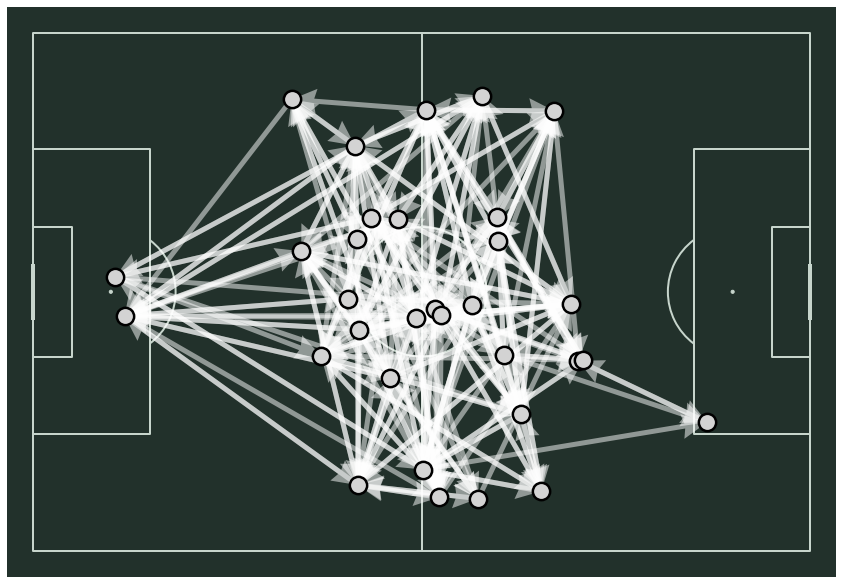

In [ ]:
#pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')

fig, ax = pitch.draw(figsize=(13, 8),
              constrained_layout=True, tight_layout=False)

#plot the arrows
arrows = pitch.arrows(1.2*passesbetweenBR.x,.8*passesbetweenBR.y,1.2*passesbetweenBR.x_end,.8*passesbetweenBR.y_end,
                     width = 5, headwidth = 5, color = 'w', ax = ax, zorder = 1, alpha = .5)

#plot the nodes
nodes = pitch.scatter(1.2*averagelocationBR.x,.8*averagelocationBR.y,
                     s = 300, color = '#d3d3d3', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1, ax=ax)

#make annotations

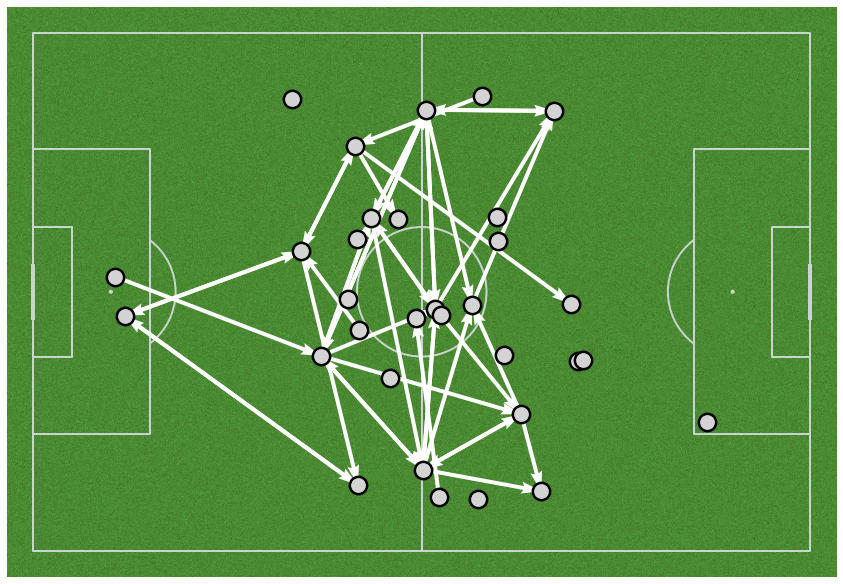

In [ ]:
#with threshold
pass_between = passesbetweenBR[passesbetweenBR['pass_count']>5]

#pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='#c7d5cc')

fig, ax = pitch.draw(figsize=(13, 8),
              constrained_layout=True, tight_layout=False)

#plot the arrows
arrows = pitch.arrows(1.2*pass_between.x,.8*pass_between.y,1.2*pass_between.x_end,.8*pass_between.y_end,ax=ax, color='white')

#plot the nodes
nodes = pitch.scatter(1.2*averagelocationBR.x,.8*averagelocationBR.y,
                      s = 300, color = '#d3d3d3', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1, ax=ax)

In [ ]:
#servia and successfull passes
SVpass_df = passes_df[passes_df.teamId != 409]
SVpass_df = passes_df[passes_df.outcomeType != "Unsuccessful"]

ARRUMAR average location and how many times it happened

In [ ]:
#ALL anything successful
def get_passes_df(events_dict):
    df = pd.DataFrame(events_dict)
    df['eventType'] = df.apply(lambda row: row['type']['displayName'], axis=1)
    df['outcomeType'] = df.apply(lambda row: row['outcomeType']['displayName'], axis=1)

    # create receiver column based on the next event
    # this will be correct only for successfull passes
    df["receiver"] = df["playerId"].shift(-1)

    # filter only passes
    passes_ids = df.index[df['eventType'] != 'Start']
    df_passes = df.loc[
        passes_ids, ["id", "x", "y", "endX", "endY", "teamId", "playerId", "receiver", "eventType", "outcomeType"]]

    return df_passes

In [ ]:
passarALL_df = get_passes_df(events_dict)
passarALL_df

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType
2,2.487478e+09,50.0,49.9,52.3,52.8,409,317804.0,50835.0,Pass,Successful
3,2.487478e+09,50.6,61.4,39.0,93.8,409,50835.0,100995.0,Pass,Successful
4,2.487478e+09,44.2,91.7,37.9,70.1,409,100995.0,88526.0,Pass,Successful
5,2.487478e+09,35.8,68.5,28.1,52.7,409,88526.0,28550.0,Pass,Successful
6,2.487478e+09,29.8,50.1,29.6,78.3,409,28550.0,100995.0,Pass,Successful
...,...,...,...,...,...,...,...,...,...,...
1610,2.487494e+09,0.0,0.0,NaN,NaN,409,NaN,NaN,End,Successful
1611,2.487494e+09,0.0,0.0,NaN,NaN,409,NaN,NaN,End,Successful
1612,2.487494e+09,0.0,0.0,NaN,NaN,771,NaN,NaN,End,Successful
1613,2.487463e+09,0.0,0.0,NaN,NaN,409,NaN,NaN,FormationSet,Successful



#Tutorial blog

---



---



Plot do jogo inteiro

In [ ]:
def get_passes_between_df(team_id, passes_df, players_df):
    # filter for only team
    passes_df = passes_df[passes_df["teamId"] == team_id]

    # add column with first eleven players only
    passes_df = passes_df.merge(players_df[["playerId", "isFirstEleven"]], on='playerId', how='left')
    # filter on first eleven column
    passes_df = passes_df[passes_df['isFirstEleven'] == True]

    # calculate mean positions for players
    average_locs_and_count_df = (passes_df.groupby('playerId')
                                 .agg({'x': ['mean'], 'y': ['mean', 'count']}))
    average_locs_and_count_df.columns = ['x', 'y', 'count']
    average_locs_and_count_df = average_locs_and_count_df.merge(players_df[['playerId', 'name', 'shirtNo', 'position']],
                                                                on='playerId', how='left')
    average_locs_and_count_df = average_locs_and_count_df.set_index('playerId')

    # calculate the number of passes between each position (using min/ max so we get passes both ways)
    passes_player_ids_df = passes_df.loc[:, ['id', 'playerId', 'receiver', 'teamId']]
    passes_player_ids_df['pos_max'] = (passes_player_ids_df[['playerId', 'receiver']].max(axis='columns'))
    passes_player_ids_df['pos_min'] = (passes_player_ids_df[['playerId', 'receiver']].min(axis='columns'))

    # get passes between each player
    passes_between_df = passes_player_ids_df.groupby(['pos_min', 'pos_max']).id.count().reset_index()
    passes_between_df.rename({'id': 'pass_count'}, axis='columns', inplace=True)

    # add on the location of each player so we have the start and end positions of the lines
    passes_between_df = passes_between_df.merge(average_locs_and_count_df, left_on='pos_min', right_index=True)
    passes_between_df = passes_between_df.merge(average_locs_and_count_df, left_on='pos_max', right_index=True,
                                                suffixes=['', '_end'])
    return passes_between_df, average_locs_and_count_df

In [ ]:
home_team_id = list(teams_dict.keys())[0]  # selected home team
home_passes_between_df, home_average_locs_and_count_df = get_passes_between_df(home_team_id, passes_df, players_df)

In [ ]:
away_team_id = list(teams_dict.keys())[1]  # selected home team
away_passes_between_df, away_average_locs_and_count_df = get_passes_between_df(away_team_id, passes_df, players_df)

In [ ]:
def pass_network_visualization(ax, passes_between_df, average_locs_and_count_df, flipped=False):
    MAX_LINE_WIDTH = 10
    MAX_MARKER_SIZE = 3000
    passes_between_df['width'] = (passes_between_df.pass_count / passes_between_df.pass_count.max() *
                                  MAX_LINE_WIDTH)
    average_locs_and_count_df['marker_size'] = (average_locs_and_count_df['count']
                                                / average_locs_and_count_df['count'].max() * MAX_MARKER_SIZE)

    MIN_TRANSPARENCY = 0.3
    color = np.array(to_rgba('black'))
    color = np.tile(color, (len(passes_between_df), 1))
    c_transparency = passes_between_df.pass_count / passes_between_df.pass_count.max()
    c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
    color[:, 3] = c_transparency

    pitch = Pitch(pitch_type='opta', pitch_color='grass', line_color='white', stripe=True)
    pitch.draw(ax=ax)

    if flipped:
        passes_between_df['x'] = pitch.dim.right - passes_between_df['x']
        passes_between_df['y'] = pitch.dim.right - passes_between_df['y']
        passes_between_df['x_end'] = pitch.dim.right - passes_between_df['x_end']
        passes_between_df['y_end'] = pitch.dim.right - passes_between_df['y_end']
        average_locs_and_count_df['x'] = pitch.dim.right - average_locs_and_count_df['x']
        average_locs_and_count_df['y'] = pitch.dim.right - average_locs_and_count_df['y']

    pass_lines = pitch.lines(passes_between_df.x, passes_between_df.y,
                             passes_between_df.x_end, passes_between_df.y_end, lw=passes_between_df.width,
                             color=color, zorder=1, ax=ax)
    pass_nodes = pitch.scatter(average_locs_and_count_df.x, average_locs_and_count_df.y,
                               s=average_locs_and_count_df.marker_size, marker='h',
                               color='white', edgecolors='black', linewidth=1, alpha=1, ax=ax)
    for index, row in average_locs_and_count_df.iterrows():
        player_name = row["name"].split()
        player_initials = "".join(word[0] for word in player_name).upper()
        pitch.annotate(player_initials, xy=(row.x, row.y), c='black', va='center',
                       ha='center', size=14, ax=ax)

    return pitch

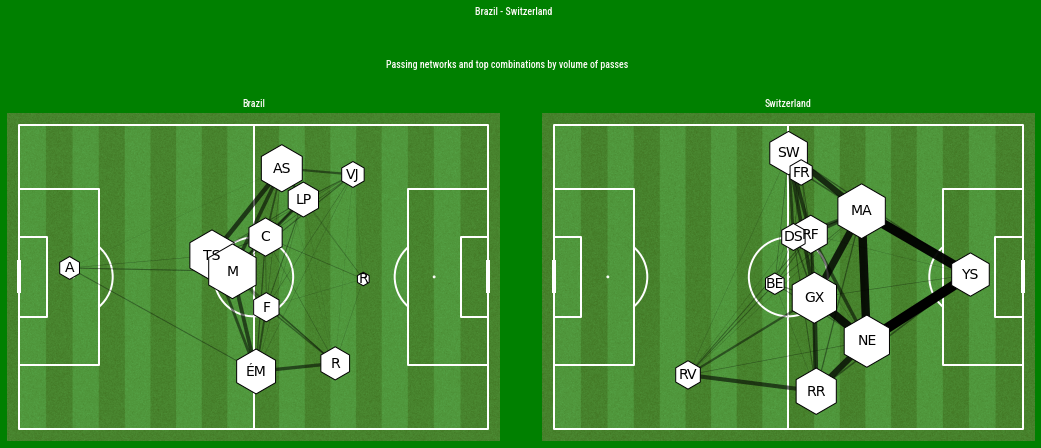

In [ ]:
# create plot
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
axes = axes.flat
plt.tight_layout()
fig.set_facecolor("green")

# plot variables
main_color = '#FBFAF5'
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "RobotoCondensed-Medium.ttf?raw=true"))

# home team viz
pass_network_visualization(axes[0], home_passes_between_df, home_average_locs_and_count_df)
axes[0].set_title(teams_dict[home_team_id], color=main_color, fontsize=14, fontproperties=font_bold.prop)

# away team viz
pass_network_visualization(axes[1], away_passes_between_df, away_average_locs_and_count_df, flipped=True)
axes[1].set_title(teams_dict[away_team_id], color=main_color, fontsize=14, fontproperties=font_bold.prop)

plt.suptitle(f"{teams_dict[home_team_id]} - {teams_dict[away_team_id]}", color=main_color, fontsize=42, fontproperties=font_bold.prop)
subtitle = "Passing networks and top combinations by volume of passes"
plt.text(-10, 120, subtitle, horizontalalignment='center', verticalalignment='center', color=main_color, fontsize=14, fontproperties=font_bold.prop)
plt.savefig('output.png', bbox_inches='tight')
plt.show()

siglas de nodes são siglas dos jogadores

#Gol

tentar fazer df da jogada com o gol usando a internet (scrapping):

In [ ]:
def get_shot_df(events_dict):
    df = pd.DataFrame(events_dict)
    df['eventType'] = df.apply(lambda row: row['type']['displayName'], axis=1)
    df['outcomeType'] = df.apply(lambda row: row['outcomeType']['displayName'], axis=1)

    # create receiver column based on the next event
    # this will be correct only for successfull passes
    df["receiver"] = df["playerId"].shift(-1)

    # filter shots thtat scored
    shot_ids = df.index[df['eventType'] == 'Goal']
    df_shot = df.loc[
        shot_ids, ["id", "x", "y", "endX", "endY", "teamId", "playerId", "receiver", "eventType", "outcomeType"]]

    return df_shot

numero de gols na partida:

In [ ]:
shots_df = get_shot_df(events_dict)
shots_df

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType
1434,2.488205e+09,87.3,63.3,NaN,NaN,409,88526.0,74016.0,Goal,Successful




---



In [ ]:
dssssf = pd.DataFrame (events_dict)
print(dssssf)
#ver o titulo de cada coluna

In [ ]:
#ver o nome de cada coluna do df
column_names = list(dssssf.columns.values)
print(column_names)

['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y', 'expandedMinute', 'period', 'type', 'outcomeType', 'qualifiers', 'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX', 'endY', 'relatedEventId', 'relatedPlayerId', 'goalMouthZ', 'goalMouthY', 'isShot', 'blockedX', 'blockedY', 'cardType', 'isGoal']


In [ ]:
#show column of goals
print(dssssf['isGoal'].to_string())

In [ ]:
#df do jodo completo
jogodf = dssssf.loc[:, ["id",'minute','second','playerId',"x", "y", "endX", "endY", "teamId", 'type', 'x','y',"outcomeType"]]
jogodf

,id,minute,second,playerId,x,y,endX,endY,teamId,type,x,y,outcomeType
0,2.488192e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,423,"{'value': 32, 'displayName': 'Start'}",0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
1,2.488192e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,409,"{'value': 32, 'displayName': 'Start'}",0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
2,2.488192e+09,0,0.0,317630.0,49.8,50.0,29.9,37.6,423,"{'value': 1, 'displayName': 'Pass'}",49.8,50.0,"{'value': 1, 'displayName': 'Successful'}"
3,2.488192e+09,0,9.0,297390.0,45.8,45.1,42.1,66.5,423,"{'value': 1, 'displayName': 'Pass'}",45.8,45.1,"{'value': 1, 'displayName': 'Successful'}"
4,2.488192e+09,0,11.0,243534.0,43.2,67.8,43.5,84.8,423,"{'value': 1, 'displayName': 'Pass'}",43.2,67.8,"{'value': 1, 'displayName': 'Successful'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,2.488207e+09,95,54.0,NaN,0.0,0.0,NaN,NaN,409,"{'value': 30, 'displayName': 'End'}",0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
1647,2.488207e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,423,"{'value': 30, 'displayName': 'End'}",0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
1648,2.488207e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,409,"{'value': 30, 'displayName': 'End'}",0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
1649,2.488181e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,409,"{'value': 34, 'displayName': 'FormationSet'}",0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"


In [ ]:
jogodf.dtypes

id             float64
minute           int64
second         float64
playerId       float64
x              float64
y              float64
endX           float64
endY           float64
teamId           int64
type            object
x              float64
y              float64
outcomeType     object
dtype: object

In [ ]:
#float type to string
jogodf['type'] = jogodf['type'].astype(str)

In [ ]:
#teste remove '
#jogodf['type'] = jogodf['type'].str.replace("'", '')

In [ ]:
#cleaning df
jogodf = jogodf.replace(["{'value': 1, 'displayName': 'Pass'}"], 'Pass')
jogodf = jogodf.replace(["{'value': 32, 'displayName': 'Start'}"], 'Start')
jogodf = jogodf.replace(["{'value': 30, 'displayName': 'End'}	"], 'End')
jogodf = jogodf.replace(["{'value': 50, 'displayName': 'Dispossessed'}"], 'Dispossessed')
jogodf = jogodf.replace(["{'value': 7, 'displayName': 'Tackle'}"], 'Tackle')
jogodf = jogodf.replace(["{'value': 61, 'displayName': 'BallTouch'}"], 'BallTouch')
jogodf = jogodf.replace(["{'value': 4, 'displayName': 'Foul'}"], 'Foul')
jogodf = jogodf.replace(["{'value': 45, 'displayName': 'Challenge'}"], 'Challenge')
jogodf = jogodf.replace(["{'value': 17, 'displayName': 'Card'}"], 'Card')
jogodf = jogodf.replace(["{'value': 12, 'displayName': 'Clearance'}"], 'Clearance')
jogodf = jogodf.replace(["{'value': 49, 'displayName': 'BallRecovery'}"], 'BallRecovery')
jogodf = jogodf.replace(["{'value': 74, 'displayName': 'BlockedPass'}"], 'BlockedPass')
jogodf = jogodf.replace(["{'value': 45, 'displayName': 'Challenge'}"], 'Challenge')
jogodf = jogodf.replace(["{'value': 15, 'displayName': 'SavedShot'}"], 'SavedShot')
jogodf = jogodf.replace(["{'value': 52, 'displayName': 'KeeperPickup'}"], 'KeeperPickup')
jogodf = jogodf.replace(["{'value': 3, 'displayName': 'TakeOn'}"], 'TakeOn')
jogodf = jogodf.replace(["{'value': 44, 'displayName': 'Aerial'}"], 'Aerial')
jogodf = jogodf.replace(["{'value': 13, 'displayName': 'MissedShots'}"], 'MissedShots')
jogodf = jogodf.replace(["{'value': 40, 'displayName': 'FormationChange'}"], 'FormationChange')
jogodf = jogodf.replace(["{'value': 19, 'displayName': 'SubstitutionOn'}"], 'SubstitutionOn')
jogodf = jogodf.replace(["{'value': 18, 'displayName': 'SubstitutionOff'}"], 'SubstitutionOff')
jogodf = jogodf.replace(["{'value': 6, 'displayName': 'CornerAwarded'}"], 'CornerAwarded')
jogodf = jogodf.replace(["{'value': 10, 'displayName': 'Save'}"], 'Save')
jogodf = jogodf.replace(["{'value': 10000, 'displayName': 'OffsideGiven'}	"], 'OffsideGiven')
jogodf = jogodf.replace(["{'value': 14, 'displayName': 'ShotOnPost'}"], 'ShotOnPost')
jogodf = jogodf.replace(["{'value': 2, 'displayName': 'OffsidePass'}"], 'OffsidePass')
jogodf = jogodf.replace(["{'value': 55, 'displayName': 'OffsideProvoked'}	"], 'OffsideProvoked')
jogodf = jogodf.replace(["{'value': 16, 'displayName': 'Goal'}"], 'Goal')
jogodf = jogodf.replace(["{'value': 45, 'displayName': 'Challenge'}"], 'Challenge')
jogodf = jogodf.replace(["{'value': 8, 'displayName': 'Interception'}"], 'Interception')
jogodf = jogodf.replace(["{'value': 74, 'displayName': 'BlockedPass'}"], 'BlockedPass')
jogodf = jogodf.replace(["{'value': 56, 'displayName': 'ShieldBallOpp'}"], 'ShieldBallOpp')

In [ ]:
jogodf

,id,minute,second,playerId,x,y,endX,endY,teamId,type,x,y,outcomeType
0,2.488192e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,423,Start,0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
1,2.488192e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,409,Start,0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
2,2.488192e+09,0,0.0,317630.0,49.8,50.0,29.9,37.6,423,Pass,49.8,50.0,"{'value': 1, 'displayName': 'Successful'}"
3,2.488192e+09,0,9.0,297390.0,45.8,45.1,42.1,66.5,423,Pass,45.8,45.1,"{'value': 1, 'displayName': 'Successful'}"
4,2.488192e+09,0,11.0,243534.0,43.2,67.8,43.5,84.8,423,Pass,43.2,67.8,"{'value': 1, 'displayName': 'Successful'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,2.488207e+09,95,54.0,NaN,0.0,0.0,NaN,NaN,409,"{'value': 30, 'displayName': 'End'}",0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
1647,2.488207e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,423,"{'value': 30, 'displayName': 'End'}",0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
1648,2.488207e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,409,"{'value': 30, 'displayName': 'End'}",0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
1649,2.488181e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,409,"{'value': 34, 'displayName': 'FormationSet'}",0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"


In [ ]:
# jogodf.replace(to_replace="{'value': 1, 'displayName': 'Successful'}", value="Successful")
# jogodf
#jogodf = jogodf.replace(["{'value': 1, 'displayName': 'Successful'}"], 'Successful')
# jogodf = jogodf.replace("	{'value': 0, 'displayName': 'Unsuccessful'}", 'Unsuccessful')

In [ ]:
gol1 = jogodf.iloc[:1435]
gol1

,id,minute,second,playerId,x,y,endX,endY,teamId,type,x,y,outcomeType
0,2.488192e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,423,Start,0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
1,2.488192e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,409,Start,0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
2,2.488192e+09,0,0.0,317630.0,49.8,50.0,29.9,37.6,423,Pass,49.8,50.0,"{'value': 1, 'displayName': 'Successful'}"
3,2.488192e+09,0,9.0,297390.0,45.8,45.1,42.1,66.5,423,Pass,45.8,45.1,"{'value': 1, 'displayName': 'Successful'}"
4,2.488192e+09,0,11.0,243534.0,43.2,67.8,43.5,84.8,423,Pass,43.2,67.8,"{'value': 1, 'displayName': 'Successful'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,2.488205e+09,82,5.0,338780.0,64.2,28.4,63.2,54.5,409,Pass,64.2,28.4,"{'value': 1, 'displayName': 'Successful'}"
1431,2.488205e+09,82,8.0,101949.0,70.0,70.8,82.3,91.7,409,Pass,70.0,70.8,"{'value': 1, 'displayName': 'Successful'}"
1432,2.488205e+09,82,13.0,337782.0,80.3,71.7,80.3,60.2,409,Pass,80.3,71.7,"{'value': 1, 'displayName': 'Successful'}"
1433,2.488205e+09,82,14.0,347862.0,80.3,60.2,89.1,63.3,409,Pass,80.3,60.2,"{'value': 1, 'displayName': 'Successful'}"


{409: 'Brazil', 423: 'Switzerland'}

index 1434	goal
1422 ball recovery from Brazil

Pass from 81:45min until goal at 82:16min

In [ ]:
gol1 = gol1.iloc[1422:]
gol1

,id,minute,second,playerId,x,y,endX,endY,teamId,type,x,y,outcomeType
1422,2.488205e+09,81,45.0,88526.0,28.6,89.7,NaN,NaN,409,BallRecovery,28.6,89.7,"{'value': 1, 'displayName': 'Successful'}"
1423,2.488205e+09,81,46.0,88526.0,28.6,89.7,35.9,64.2,409,Pass,28.6,89.7,"{'value': 1, 'displayName': 'Successful'}"
1424,2.488205e+09,81,47.0,338780.0,35.9,64.2,NaN,NaN,409,BallTouch,35.9,64.2,"{'value': 1, 'displayName': 'Successful'}"
1425,2.488205e+09,81,50.0,347862.0,37.4,62.2,NaN,NaN,409,TakeOn,37.4,62.2,"{'value': 0, 'displayName': 'Unsuccessful'}"
1426,2.488205e+09,81,50.0,89401.0,62.6,37.8,NaN,NaN,423,Tackle,62.6,37.8,"{'value': 0, 'displayName': 'Unsuccessful'}"
1427,2.488205e+09,81,55.0,347862.0,46.4,39.2,64.0,10.6,409,Pass,46.4,39.2,"{'value': 1, 'displayName': 'Successful'}"
1428,2.488205e+09,81,59.0,337879.0,71.7,5.8,72.2,14.9,409,Pass,71.7,5.8,"{'value': 1, 'displayName': 'Successful'}"
1429,2.488205e+09,82,3.0,364315.0,73.8,17.8,64.1,23.5,409,Pass,73.8,17.8,"{'value': 1, 'displayName': 'Successful'}"
1430,2.488205e+09,82,5.0,338780.0,64.2,28.4,63.2,54.5,409,Pass,64.2,28.4,"{'value': 1, 'displayName': 'Successful'}"
1431,2.488205e+09,82,8.0,101949.0,70.0,70.8,82.3,91.7,409,Pass,70.0,70.8,"{'value': 1, 'displayName': 'Successful'}"


In [ ]:
# #create reciever column
# gol1['receiver'] = gol1.loc[:, 'playerId']
# gol1

In [ ]:
gol1.loc[:, 'receiver'] = gol1.playerId.shift(-1)
gol1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,id,minute,second,playerId,x,y,endX,endY,teamId,type,x,y,outcomeType,receiver
1422,2.488205e+09,81,45.0,88526.0,28.6,89.7,NaN,NaN,409,BallRecovery,28.6,89.7,"{'value': 1, 'displayName': 'Successful'}",88526.0
1423,2.488205e+09,81,46.0,88526.0,28.6,89.7,35.9,64.2,409,Pass,28.6,89.7,"{'value': 1, 'displayName': 'Successful'}",338780.0
1424,2.488205e+09,81,47.0,338780.0,35.9,64.2,NaN,NaN,409,BallTouch,35.9,64.2,"{'value': 1, 'displayName': 'Successful'}",347862.0
1425,2.488205e+09,81,50.0,347862.0,37.4,62.2,NaN,NaN,409,TakeOn,37.4,62.2,"{'value': 0, 'displayName': 'Unsuccessful'}",89401.0
1426,2.488205e+09,81,50.0,89401.0,62.6,37.8,NaN,NaN,423,Tackle,62.6,37.8,"{'value': 0, 'displayName': 'Unsuccessful'}",347862.0
1427,2.488205e+09,81,55.0,347862.0,46.4,39.2,64.0,10.6,409,Pass,46.4,39.2,"{'value': 1, 'displayName': 'Successful'}",337879.0
1428,2.488205e+09,81,59.0,337879.0,71.7,5.8,72.2,14.9,409,Pass,71.7,5.8,"{'value': 1, 'displayName': 'Successful'}",364315.0
1429,2.488205e+09,82,3.0,364315.0,73.8,17.8,64.1,23.5,409,Pass,73.8,17.8,"{'value': 1, 'displayName': 'Successful'}",338780.0
1430,2.488205e+09,82,5.0,338780.0,64.2,28.4,63.2,54.5,409,Pass,64.2,28.4,"{'value': 1, 'displayName': 'Successful'}",101949.0
1431,2.488205e+09,82,8.0,101949.0,70.0,70.8,82.3,91.7,409,Pass,70.0,70.8,"{'value': 1, 'displayName': 'Successful'}",337782.0


In [ ]:
fggd = pd.DataFrame(gol1)
fggd['receiver'] = fggd['receiver'].fillna(0)
fggd

,id,minute,second,playerId,x,y,endX,endY,teamId,type,x,y,outcomeType,receiver
1422,2.488205e+09,81,45.0,88526.0,28.6,89.7,NaN,NaN,409,BallRecovery,28.6,89.7,"{'value': 1, 'displayName': 'Successful'}",88526.0
1423,2.488205e+09,81,46.0,88526.0,28.6,89.7,35.9,64.2,409,Pass,28.6,89.7,"{'value': 1, 'displayName': 'Successful'}",338780.0
1424,2.488205e+09,81,47.0,338780.0,35.9,64.2,NaN,NaN,409,BallTouch,35.9,64.2,"{'value': 1, 'displayName': 'Successful'}",347862.0
1425,2.488205e+09,81,50.0,347862.0,37.4,62.2,NaN,NaN,409,TakeOn,37.4,62.2,"{'value': 0, 'displayName': 'Unsuccessful'}",89401.0
1426,2.488205e+09,81,50.0,89401.0,62.6,37.8,NaN,NaN,423,Tackle,62.6,37.8,"{'value': 0, 'displayName': 'Unsuccessful'}",347862.0
1427,2.488205e+09,81,55.0,347862.0,46.4,39.2,64.0,10.6,409,Pass,46.4,39.2,"{'value': 1, 'displayName': 'Successful'}",337879.0
1428,2.488205e+09,81,59.0,337879.0,71.7,5.8,72.2,14.9,409,Pass,71.7,5.8,"{'value': 1, 'displayName': 'Successful'}",364315.0
1429,2.488205e+09,82,3.0,364315.0,73.8,17.8,64.1,23.5,409,Pass,73.8,17.8,"{'value': 1, 'displayName': 'Successful'}",338780.0
1430,2.488205e+09,82,5.0,338780.0,64.2,28.4,63.2,54.5,409,Pass,64.2,28.4,"{'value': 1, 'displayName': 'Successful'}",101949.0
1431,2.488205e+09,82,8.0,101949.0,70.0,70.8,82.3,91.7,409,Pass,70.0,70.8,"{'value': 1, 'displayName': 'Successful'}",337782.0


In [ ]:
#save as csv
gol1.to_csv('golsuica.csv')



---



---



---



In [ ]:
dfBU1 = pd.read_csv("/content/golsuica - suca.csv")
print(dfBU1)

            playerId      x      y   endX   endY         receiver
0         1 Casemiro  28.60  89.70  35.90  64.20  Bruno Guimarães
1   1Bruno Guimarães  35.90  64.20  37.40  62.20          Rodrygo
2           1Rodrygo  37.40  62.20  62.60  37.80     Granit Xhaka
3       Granit Xhaka  62.60  37.80  46.40  39.20          Rodrygo
4           2Rodrygo  46.40  39.20  67.85   8.20     Éder Militão
5       Éder Militão  67.85   8.20  73.00  16.35           Antony
6             Antony  73.00  16.35  64.15  25.95  Bruno Guimarães
7   2Bruno Guimarães  64.15  25.95  66.60  62.65       Marquinhos
8         Marquinhos  66.60  62.65  81.30  81.70  Vinícius Junior
9    Vinícius Junior  81.30  81.70  80.30  60.20          Rodrygo
10          2Rodrygo  80.30  60.20  87.30  63.30         Casemiro
11          Casemiro  87.30  63.30  99.00  49.00              GOL


In [ ]:
id = [1,1,1,1,1,1,1,1,1,1.1,1,1]
dfBU1['pass_count'] = id

In [ ]:
#find average location for all players in df dataframe
averagelocationBR1 = dfBU1.groupby('playerId').agg({'x':['mean'],'y':['mean','count']})
averagelocationBR1.columns = ['x','y','count']

averagelocasstionBR = dfBU1.groupby('receiver').agg({'endX':['mean'],'endY':['mean','count']})
averagelocasstionBR.columns = ['x','y','count']

averagelocationBR = pd.concat([averagelocationBR1,averagelocasstionBR])

In [ ]:
MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
dfBU1['width'] = (dfBU1.pass_count / dfBU1.pass_count.max() *
                           MAX_LINE_WIDTH)
averagelocationBR['marker_size'] = (averagelocationBR['count']
                                         / averagelocationBR['count'].max() * MAX_MARKER_SIZE)

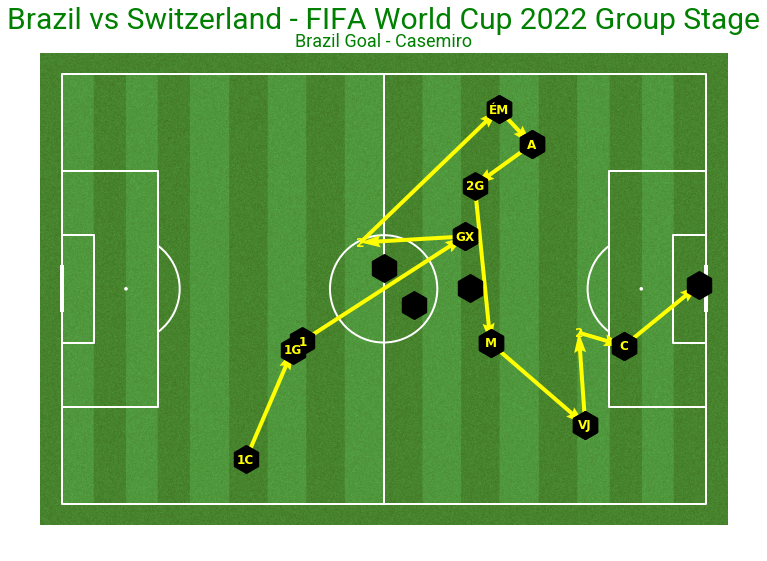

In [ ]:
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/'
                       'rubikmonoone/RubikMonoOne-Regular.ttf')


#opta
#pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True)
fig, axs = pitch.grid(figheight=8, title_height=0.08, endnote_space=0,
                      axis=False,
                      title_space=0, grid_height=0.82, endnote_height=0.05)
#fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)

#plot the arrows
arrows = pitch.arrows(1.2*dfBU1.x,.8*dfBU1.y,1.2*dfBU1.endX,.8*dfBU1.endY,lw=dfBU1.width,zorder=1, ax=axs['pitch'], color='yellow')

#plot the nodes
nodes = pitch.scatter(1.2*averagelocationBR.x,.8*averagelocationBR.y,marker='h',
                      s = 700, color = 'black', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1, ax=axs['pitch'])

for index, row in dfBU1.iterrows():
    player_name = row["playerId"].split()
    player_initials = "".join(word[0] for word in player_name).upper()
    pitch.annotate(player_initials, xy=(1.2*row.x, 0.8*row.y), c='yellow', va='center',
                       ha='center', weight='bold',size=12, ax=axs['pitch'])


URL = 'https://raw.githubusercontent.com/google/fonts/main/apache/roboto/Roboto%5Bwdth,wght%5D.ttf'
robotto_regular = FontManager(URL)

# endnote /title
# axs['endnote'].text(1, 0.5, '@your_twitter_handle', color='#c7d5cc',
#                     va='center', ha='right', fontsize=15,
#                     fontproperties=robotto_regular.prop)
TITLE_TEXT = f'Brazil vs Switzerland - FIFA World Cup 2022 Group Stage'
axs['title'].text(0.5, 0.7, TITLE_TEXT, color='green',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=30)
axs['title'].text(0.5, 0.25, 'Brazil Goal - Casemiro', color='green',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=18)

# sphinx_gallery_thumbnail_path = 'gallery/pitch_plots/images/sphx_glr_plot_pass_network_002.png'
plt.savefig('BRCH4.png', bbox_inches='tight')
plt.show()  # If you are using a Jupyter notebook you do not need this line

In [ ]:
#  # calculate mean positions for players
# average_locs_and_count_df = (fggd.groupby('playerId').agg({'x': ['mean'], 'y': ['mean', 'count']}))
# average_locs_and_count_df.columns = ['x', 'y', 'count']

In [ ]:
# #adicionar coluna passe com nome
# nameplayer = ['Vanja Savic', 'Vanja Savic', 'Filip Mladenovic', 'Ivan Ilic','Sasa Lukic', 'Nikola Milenkovic','Vanja Savic','Strahinja Pavlovic','Vanja Savic','Danilo','Danilo','Filip Mladenovic','Ivan Ilic','Ivan Ilic','Vanja Savic',
#               'Thiago Silva', 'Marquinhos','Marquinhos','Alex Sandro','Neymar','Alex Sandro','Casemiro','Danilo','Raphinha','Thiago Silva','Alex Sandro',
#               'Marquinhos','Alex Sandro','Vinícius Junior','Casemiro', 'Danilo','Filip Mladenovic','Raphinha','Raphinha','Neymar','Sergej Savic', 'Sergej Savic', 'Thiago Silva','Thiago Silva','Danilo','Casemiro','Neymar','Vinícius Junior', 'Vanja Savic','Richarlison']

# gol1['nameplayer'] = nameplayer

In [ ]:
# #adicionar coluna receiver nome
# namereceiver = ['Vanja Savic', 'Filip Mladenovic', 'Ivan Ilic','Sasa Lukic', 'Nikola Milenkovic','Vanja Savic','Strahinja Pavlovic','Vanja Savic','Danilo','Danilo','Filip Mladenovic','Ivan Ilic','Ivan Ilic','Vanja Savic',
#               'Thiago Silva', 'Marquinhos','Marquinhos','Alex Sandro','Neymar','Alex Sandro','Casemiro','Danilo','Raphinha','Thiago Silva','Alex Sandro',
#               'Marquinhos','Alex Sandro','Vinícius Junior','Casemiro', 'Danilo','Filip Mladenovic','Raphinha','Raphinha','Neymar','Sergej Savic', 'Sergej Savic', 'Thiago Silva','Thiago Silva','Danilo','Casemiro','Neymar','Vinícius Junior', 'Vanja Savic','Richarlison','Vanja Savic']

# gol1['namereceiver'] = namereceiver

In [ ]:
#this makes it so our passer and recipients are float values
pas = pd.to_numeric(gol1['playerId'],downcast='integer')
rec = pd.to_numeric(gol1['receiver'],downcast='integer')
gol1['playerId'] = pas
gol1['receiver'] = rec

In [ ]:
#  # calculate mean positions for players
# average_locs_and_count_df = (passes_df.groupby('playerId')
#                                  .agg({'x': ['mean'], 'y': ['mean', 'count']}))
# average_locs_and_count_df.columns = ['x', 'y', 'count']
# average_locs_and_count_df = average_locs_and_count_df.merge(gol1[['playerId', 'receiver',	'nameplayer',	'namereceiver']],
#                                                                 on='playerId', how='left')
# average_locs_and_count_df = average_locs_and_count_df.set_index('playerId')

In [ ]:
#make sring of playerId
gol1['playerId'] = gol1['playerId'].astype(str)

In [ ]:
for i in new:
  if i is in gol1:
    change gol1[i] to new['name']

gol1.head()

In [ ]:

gol1.playerId[gol1.playerId == i] = new['name'][i]

In [ ]:
for index, row in new.iterrows():
  player_name = row["name"].split()
  player_initials = "".join(word[0] for word in player_name).upper()


NameError: ignored

In [ ]:
for i in players_df.index:
    if players_df['playerId'][i] == gol1['playerId'][i]:
      gol1['playerId'][i] == players_df['name'][i]

KeyError: ignored

In [ ]:
print(dssssf['playerId'].to_string())

In [ ]:
print(dssssf['type'].to_string())



---



---



---



DF de passe gol assitindo o jogo:

Primeiro Gol:

In [ ]:
data = [['Casemiro', 'Neymar', 'Pass','Directed'], ['Neyamr', 'Vini Jr.', ' Pass', 'Directed' ],
        ['Vini Jr.', 'Servia Goalkeeper','Shot','Directed'],['Servia Goalkeeper', 'Richarlison', 'Defense','Directed'],['Richarlison', 'Goalkeeper','Goal','Directed']]

# Create the pandas DataFrame
df_gol1jogo = pd.DataFrame(data, columns=['Passer', 'Reciever', 'Pass','Type'])

df_gol1jogo

,Player,Reciever,Pass,Type
0,Casemiro,Neymar,Pass,Directed
1,Neyamr,Vini Jr.,Pass,Directed
2,Vini Jr.,Servia Goalkeeper,Shot,Directed
3,Servia Goalkeeper,Richarlison,Defense,Directed
4,Richarlison,Goalkeeper,Goal,Directed


In [ ]:
#players positions x and y add to df
posicao = [['x','y','xend','yend'],['x','y','xend','yend'],['x','y','xend','yend'],['x','y','xend','yend'],['94.8','50.0','GOL','GOL']]

df_gol1jogo = pd.DataFrame(data, columns=['x', 'y', 'x_end','y_end'])

df_gol1jogo = df_gol1jogo.concat(posicao)
df_gol1jogo

#teste para Gephi

In [ ]:
passes_df.head()

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType
2,1.358156e+09,50.0,50.5,41.6,51.1,337,24088.0,87449.0,Pass,Successful
3,1.889672e+09,38.2,49.9,34.8,29.5,337,87449.0,20874.0,Pass,Successful
4,2.065149e+09,34.8,26.2,34.6,2.5,337,20874.0,77059.0,Pass,Successful
5,1.113896e+09,34.7,2.5,11.1,32.4,337,77059.0,29214.0,Pass,Successful
6,1.926220e+09,11.1,32.4,60.5,47.2,337,29214.0,24088.0,Pass,Unsuccessful


In [ ]:
#filter by only successful passes
passdf = passes_df[passes_df.outcomeType != "Unsuccessful"]
passdf.head()

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType
2,1.358156e+09,50.0,50.5,41.6,51.1,337,24088.0,87449.0,Pass,Successful
3,1.889672e+09,38.2,49.9,34.8,29.5,337,87449.0,20874.0,Pass,Successful
4,2.065149e+09,34.8,26.2,34.6,2.5,337,20874.0,77059.0,Pass,Successful
5,1.113896e+09,34.7,2.5,11.1,32.4,337,77059.0,29214.0,Pass,Successful
10,1.951478e+09,65.0,77.9,51.9,77.6,337,70524.0,22732.0,Pass,Successful


In [ ]:
passdf.to_csv('final2018.csv')

In [ ]:
players_df.head()

In [ ]:
players_df.to_csv('playerdf.csv')

In [ ]:
newpassdf = passdf[['playerId', 'receiver','outcomeType']]
newpassdf.head()

,playerId,receiver,outcomeType
2,24088.0,87449.0,Successful
3,87449.0,20874.0,Successful
4,20874.0,77059.0,Successful
5,77059.0,29214.0,Successful
10,70524.0,22732.0,Successful


In [ ]:
newpassdf = newpassdf.rename(columns={'playerId': 'source', 'receiver': 'target', 'outcomeType': 'type'})
newpassdf.head()

,source,target,type
2,24088.0,87449.0,Successful
3,87449.0,20874.0,Successful
4,20874.0,77059.0,Successful
5,77059.0,29214.0,Successful
10,70524.0,22732.0,Successful


In [ ]:
newpassdf.to_csv('novofinal2018.csv')